In [ ]:
import torch
print(torch.__version__)

2.6.0+cpu


In [ ]:
from torchvision import datasets

download_dir = ".datasets"

train_data = datasets.CIFAR100(root = download_dir, train = True, download = True)
test_data = datasets.CIFAR100(root = download_dir, train = False, download = True)

train_data

100%|██████████| 169M/169M [10:25<00:00, 270kB/s]     


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: .datasets
    Split: Train

In [4]:
X_train = torch.tensor(train_data.data, dtype = torch.float32) / 255.0
X_train = X_train.permute(0,3,1,2)
y_train = torch.tensor(train_data.targets, dtype = torch.long)

X_test = torch.tensor(test_data.data, dtype = torch.float32) / 255.0
X_test = X_test.permute(0,3,1,2)
y_test = torch.tensor(test_data.data, dtype = torch.long)

X_test.shape, y_train.shape

(torch.Size([10000, 3, 32, 32]), torch.Size([50000]))

In [7]:
classes = train_data.classes
classes[0:5]

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']

In [9]:
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
    ('con1', torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding = 'same')),
    ('act1', torch.nn.ReLU()),
    ('pol1', torch.nn.MaxPool2d(kernel_size = 2, stride = 2)),
    ('con2', torch.nn.Conv2d(in_channels=32, out_channels= 64, kernel_size=(3,3), padding = 'same')),
    ('act2', torch.nn.ReLU()),
    ('pol2', torch.nn.MaxPool2d(kernel_size = 2, stride = 2)),
    ('con3', torch.nn.Conv2d(in_channels=64,out_channels=128, kernel_size = (3,3), padding = 'same')),
    ('act3', torch.nn.ReLU()),
    ('flat', torch.nn.Flatten()),
    ('lin1', torch.nn.Linear(in_features = 128*8*8, out_features= 512)),
    ('act4', torch.nn.ReLU()),
    ('drop', torch.nn.Dropout(p=0.5)),
    ('lin2', torch.nn.Linear(in_features = 512, out_features = 100)),
    ]))

In [10]:
import torch.optim.sgd


optimizer = torch.optim.SGD(
    model.parameters(),
    lr = 0.01
)

loss_func = torch.nn.CrossEntropyLoss()
epochs = 15

In [13]:
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm_notebook

dataset = torch.utils.data.TensorDataset(X_train,y_train)
dataloader = DataLoader(dataset, batch_size=128, shuffle = True)

losses = []

for epoch in range(epochs):
    with tqdm_notebook(total = len(dataloader), desc=f"Колян геюга {epoch+1}") as inner_pbar:
        for batch_x, batch_y in dataloader:
            optimizer.zero_grad()
            y_pred = model(batch_x)
            loss = loss_func(y_pred, batch_y)
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            inner_pbar.set_postfix({'Batch Loss': f"{loss.item():.4f}"})
            inner_pbar.update(1)

Колян геюга 1:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 2:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 3:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 4:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 5:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 6:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 7:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 8:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 9:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 10:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 11:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 12:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 13:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 14:   0%|          | 0/391 [00:00<?, ?it/s]

Колян геюга 15:   0%|          | 0/391 [00:00<?, ?it/s]

In [17]:
res = model(X_test)
res = res.argmax(dim = 1)
res = res.numpy()
res

array([12, 66, 59, ..., 18,  3,  0], shape=(10000,))

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(res, test_data.targets)

0.1655

In [ ]:
import matplotlib.pyplot as plt

In [55]:
img, pred = test_data.data[28], test_data.classes[res[28]]

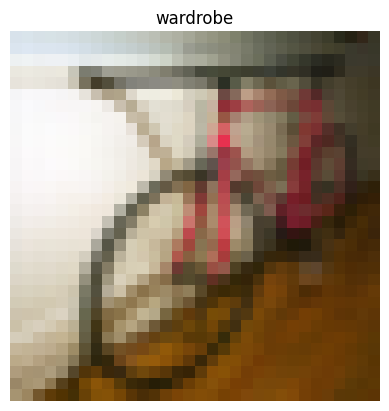

In [57]:
plt.imshow(img, cmap='gray')
plt.title(pred)
plt.axis('off')
plt.show()